In [1]:
import pandas as pd
import matplotlib.pyplot as plt

apple_data = pd.read_csv("AppleStore.csv")
description = pd.read_csv("appleStore_description.csv")

In [56]:
apple_data = apple_data[apple_data["price"]<10]
apple_data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [57]:
apple_data.groupby("price")["id"].count()

price
0.00    4056
0.99     728
1.99     621
2.99     683
3.99     277
4.99     394
5.99      52
6.99     166
7.99      33
8.99       9
9.99      81
Name: id, dtype: int64

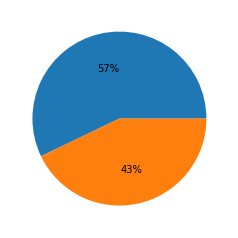

In [58]:
free_app = apple_data[apple_data["price"]==0]
paid_app = apple_data[apple_data["price"]>0]
plt.pie([free_app.id.count(),paid_app.id.count()],autopct='%1.0f%%');
#pie plot on free vs paid(#of apps), notice there is lot more portion of paid items.

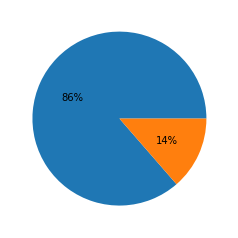

In [59]:
plt.pie([free_app.rating_count_tot.sum(),paid_app.rating_count_tot.sum()],autopct='%1.0f%%');

In [79]:
free_genre_profit = free_app.groupby("prime_genre")["rating_count_tot"].mean()
free_genre_count = free_app.groupby("prime_genre")["rating_count_tot"].count()
free_genre_df = pd.DataFrame({"profit":free_genre_profit,"count": free_genre_count})
free_genre_df = free_genre_df.sort_values("profit",ascending=False)

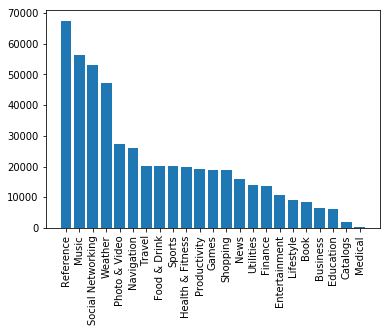

In [80]:
plt.bar(free_genre_df.index.values,free_genre_df.profit)
plt.xticks(rotation=90);
#compared by rating counts

In [62]:
#calculate profit price * downloads
paid_app["profit"] = paid_app["price"]*paid_app["rating_count_tot"]

C:\Users\tivme\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
price_genre_profit = paid_app.groupby(["price","prime_genre"])["profit"].mean()
price_genre_count = paid_app.groupby(["price","prime_genre"])["profit"].count()
price_genre_df = pd.DataFrame({"Profit": price_genre_profit,"Count":price_genre_count})
price_genre_df.sort_values("Profit",ascending=False).head(20)

,,Profit,Count
price,prime_genre,,
9.99,Music,152673.174000,5
8.99,Education,94700.660000,1
4.99,Weather,74490.720000,2
7.99,Games,72292.949286,14
6.99,Productivity,56279.985000,6
9.99,Productivity,48616.041176,17
3.99,Business,45364.970000,3
6.99,Games,44012.250222,135
3.99,News,40910.467500,4


In [77]:
paid_genre_df = pd.DataFrame({"profit":paid_app.groupby("prime_genre")["profit"].mean()})
paid_genre_df["count"] = paid_app.groupby("prime_genre")["profit"].count()
paid_genre_df = paid_genre_df.sort_values("profit",ascending=False)

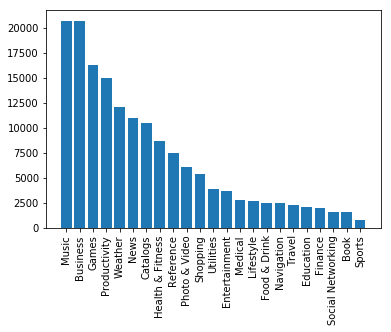

In [78]:

plt.bar(paid_genre_df.index.values,paid_genre_df["profit"])
plt.xticks(rotation=90);